In [475]:
import pandas as pd
import numpy as np
import re
import psycopg2

In [477]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="Gidrometuz",
    user="postgres",
    password="admin"
)

# Create a cursor object
cursor = conn.cursor()

# Retrieve the dataset from the database
query = "SELECT * FROM basa_2009_2022;"
cursor.execute(query)
dataset = cursor.fetchall()

# Close the cursor and the database connection
cursor.close()
conn.close()

# Access the retrieved dataset
df_2009 = pd.DataFrame(dataset)

# Access and print the DataFrame

df_2009.columns=['wmo_id','year','month','day','hour','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation']


In [478]:
id_basa=pd.read_excel("d:/Gidromet/Все МС 2009-2022.06/id_meteos.xlsx")
id_basa_0=id_basa[['wmo_id','station_name']]


In [479]:
# yangi baza faqat id va hududlar berilgan
id_meteos=pd.read_excel("d:/Gidromet/id_meteos.xlsx")
id_meteos['wmo_id']=id_meteos['wmo_id'].astype(int)
id_meteos_0=id_meteos[['wmo_id','station_name']]


In [413]:
# 2009 yil ma'lumotlarini ajratib olish
df_2009a=df_2009[df_2009['year']=='2009']
df_2009a['wmo_id']=df_2009a['wmo_id'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_8128\2469285653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009a['wmo_id']=df_2009a['wmo_id'].astype(int)


In [415]:
df_2009_1 = pd.merge(id_basa_0, df_2009a, on=['wmo_id'], how='inner')


In [480]:
# yil,oy,kun soat ustunlarini yaxlit date formatiga o'tkazadi
df_2009_2=pd.merge(id_meteos_0, df_2009_1, on=['station_name'], how='inner')
df_2009_2['hour'] = df_2009_2['hour'].astype(str)
df_2009_2['hour'] = df_2009_2['hour'].apply(lambda x: x.split('.')[0] + ':00')
df_2009_2['hour'] = pd.to_datetime(df_2009_2['hour'], format='%H:%M').dt.hour
df_2009_2['date'] = pd.to_datetime(df_2009_2[['year', 'month', 'day','hour']],errors='coerce')


In [481]:
df_concat=df_2009_2[['wmo_id_x','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','date']]
df_concat.columns=['wmo_id','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','date']



In [282]:
# df_concat['hour'] = df_concat['hour'].astype(str)
# df_concat['hour'] = df_concat['hour'].apply(lambda x: x.split('.')[0] + ':00')
# df_concat['hour'] = pd.to_datetime(df_concat['hour'], format='%H:%M').dt.hour
# df_concat['date'] = pd.to_datetime(df_concat[['year', 'month', 'day','hour']],errors='coerce')
# # df_concatj = df_concat['date'].dt.hour == 23
# df_concat.loc[df_concatj, 'date'] += pd.Timedelta(days=1)
# df_concat

# POSTGRESQL ma'lumotlat omori orqali datasetlarni chaqirib olish

In [235]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="Gidrometuz",
    user="postgres",
    password="admin"
)

# Create a cursor object
cursor = conn.cursor()

# Retrieve the dataset from the database
query = "SELECT * FROM read_file;"
cursor.execute(query)
idset = cursor.fetchall()

# Close the cursor and the database connection
cursor.close()
conn.close()

# Access the retrieved datas
id_met=pd.DataFrame(idset)
id_met.columns=['wmo_id','Stansiya','Hudud','lat','lon','height','interval']


In [482]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="Gidrometuz",
    user="postgres",
    password="admin"
)

# Create a cursor object
cursor = conn.cursor()

# Retrieve the dataset from the database
query = "SELECT * FROM uzgidromet_2000_2022;"
cursor.execute(query)
dataset = cursor.fetchall()

# Close the cursor and the database connection
cursor.close()
conn.close()

# Access the retrieved dataset
df = pd.DataFrame(dataset)

# Access and print the DataFrame

df.columns=['id','year','month','day','hour','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','None','None1']




In [181]:
# dfj = df['date'].dt.hour == 23
# dfj.loc[dfj, 'date'] -= pd.Timedelta(days=1)
# print(dfj.head(5))

In [483]:
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M').dt.hour
df['date'] = pd.to_datetime(df[['year', 'month', 'day','hour']],errors='coerce')
dfj = df['date'].dt.hour == 23
df.loc[dfj, 'date'] += pd.Timedelta(days=1)


In [484]:
df_concat_1=df[['id','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','date']]
df_concat_1.columns=['wmo_id','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','date']


In [485]:
result_vertical = pd.concat([df_concat_1, df_concat], axis=0)
result_vertical['wmo_id'] = result_vertical['wmo_id'].astype(int)


In [486]:
asd=result_vertical[result_vertical['wmo_id']==4126140]
abc=asd[asd['date'].dt.month==9]
abc['Precipitation'].sum()

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               0.0                                                     1.2                                                                                                                                                                                                                                             

In [308]:
# b=int(input("Stansiya id raqamini kiriting = "))
# ddff=result_vertical[result_vertical['wmo_id']==b]

# df_id=id_met[id_met['wmo_id']==str(b)]
# id=df_id.iloc[0][2]

# ddf=result_vertical[['date','T_air']]
# ddf['T_air'] = pd.to_numeric(ddf['T_air'], errors='coerce')
# ddf1 = ddf.groupby(pd.Grouper(key='date', freq='M')).mean()
# # ddf1=ddf1[1:]
# ddf1=ddf1.reset_index('date')
# ddf1=ddf1[ddf1['date']<='2022']
# ddf1

In [401]:
# ddff=result_vertical[result_vertical['wmo_id']=='4126140']
# ddf=ddff[['date','T_air']]
# ddf['T_air'] = pd.to_numeric(ddf['T_air'], errors='coerce')

# sd=ddff[ddff['date'].dt.year==2001]
# sd
# # ddf1 = ddf.groupby(pd.Grouper(key='date', freq='M')).mean()
# # ddf1=ddf1[1:]
# ddf1=ddf1.reset_index('date')
# ddf2=ddf1[ddf1['date']<='2022']
# print(ddf2)

In [452]:
# b=int(input("Stansiya id raqamini kiriting = "))
# ddff=result_vertical[result_vertical['wmo_id']==b]
# print(ddff)
# ddf=ddff[['date','T_air']]
# # print(ddf)

# df_id=id_met[id_met['wmo_id']==str(b)]
# id=df_id.iloc[0][2]


# ddf['T_air'] = pd.to_numeric(ddf['T_air'], errors='coerce')
# ddf1 = ddf.groupby(pd.Grouper(key='date', freq='M')).mean()
# # ddf1=ddf1[1:]

# ddf1=ddf1.reset_index('date')
# ddf2=ddf1[ddf1['date']<='2022']
# # print(ddf2.head(30))

# datax=np.zeros((22, 12))
# jj=0
# # new_index = ['2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# for i in range(len(ddf2)):
#     d= ddf2.loc[i]
#     yil=int(d[0].year-2000)
# #     print(yil)
#     month=int(d[0].month-1)

#     datax[yil,month]=d[1].round(1)
#     datax_yil=pd.DataFrame(datax)
    
#     datax_yil.columns=['yanvar','fevral','mart','aprel','may','iyun','iyul','avgust','sentabr','oktabr','noyabr','dekabr']
# #     datax_yil.insert(0,'year',str(new_index[0]))
# datax_yil.to_excel("D:/Gidromet/Meteoss/" + str(id)+".xlsx", header=True)
# print(datax_yil)

In [489]:
b=int(input("Stansiya id raqamini kiriting = "))
ddff=result_vertical[result_vertical['wmo_id']==b]

ddf=ddff[['date','Precipitation']]
# print(ddf)

df_id=id_met[id_met['wmo_id']==str(b)]
id=df_id.iloc[0][2]


ddf['Precipitation'] = pd.to_numeric(ddf['Precipitation'], errors='coerce')
ddf1 = ddf.groupby(pd.Grouper(key='date', freq='M')).sum()
# ddf1=ddf1[1:]

ddf1=ddf1.reset_index('date')
ddf2=ddf1[ddf1['date']<='2022']
# print(ddf2.head(30))

datax=np.zeros((22, 12))
jj=0
# new_index = ['2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for i in range(len(ddf2)):
    d= ddf2.loc[i]
    yil=int(d[0].year-2000)
#     print(yil)
    month=int(d[0].month-1)

    datax[yil,month]=d[1].round(1)
    datax_yil=pd.DataFrame(datax)
    
    datax_yil.columns=['yanvar','fevral','mart','aprel','may','iyun','iyul','avgust','sentabr','oktabr','noyabr','dekabr']
#     datax_yil.insert(0,'year',str(new_index[0]))
datax_yil.to_excel("D:/Gidromet/meteos_yog'in/" + str(id)+".xlsx", header=True)


Stansiya id raqamini kiriting = 4126140


C:\Users\User\AppData\Local\Temp\ipykernel_8128\1471593517.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['Precipitation'] = pd.to_numeric(ddf['Precipitation'], errors='coerce')


In [ ]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10',
             'Chrome']
df.reindex(new_index)
               http_status  response_time
Safari               404.0           0.07
Iceweasel              NaN            NaN
Comodo Dragon          NaN            NaN
IE10                 404.0           0.08
Chrome               200.0           0.02

In [299]:

# datax=np.zeros((22, 12))
# jj=0

# for i in range(len(ddf1)):
#     d= ddf1.loc[i]
#     yil=int(d[0].year-2000)
# #     print(yil)
#     month=int(d[0].month-1)

#     datax[yil,month]=d[1].round(1)
#     datax_yil=pd.DataFrame(datax)
#     datax_yil.columns=['yanvar','fevral','mart','aprel','may','iyun','iyul','avgust','sentabr','oktabr','noyabr','dekabr']
#     datax_yil.to_excel("D:/Gidromet/datax_yil.xlsx", header=True)
# print(datax_yil)
    


In [301]:
# month_mean = []
# datax=np.zeros((1, 12))
# jj=0  
# for j in range(0,13):
#     df1 = df[df['date'].dt.month == j]
#     df2 = df1.groupby(pd.Grouper(key='date', freq='M')).mean()
#     df3=df2['DHI'].mean()

#     month_mean.append((j,df3))
#     datax[jj][j-1]=df3
# jj+=1   
# dat=pd.DataFrame(datax)
# dat

In [227]:
# month_mean = []
# datax=np.zeros((21, 12))
# # datax.columns=['yanvar','fevral','mart','aprel','may','iyun','iyul','avgust','sentabr','oktabr','noyabr','dekabr']
# jj=0
# for i in range(2000,2020):
#     for j in range(1,13):
#         print("sikl boshlandi")
#         df00=df[df['id']== '4076450']
#     #     print(df00)
#         df00['hour'] = pd.to_datetime(df00['hour'], format='%H:%M').dt.hour
#         df00['date'] = pd.to_datetime(df00[['year', 'month', 'day','hour']])
#         df01=df00[['date','T_air']]
#         df01['T_air'] = df01['T_air'].astype(float)
#         dfdf=df01[df01['date'].dt.year == i]
#         df1 = df01[df01['date'].dt.month == j]

#         df02 = df1.groupby(pd.Grouper(key='date', freq='M')).mean()
        
#         df3=df02['T_air'].mean()

#         month_mean.append((j,df3))
#         datax[jj][j-1]=df3
# #         print(df3)
#     jj+=1   
# #     data_new['yanvar'] = yanvar_values
#     dat=pd.DataFrame(datax)
#     print(dat)

In [228]:
# import pandas as pd
# import numpy as np

# # Assuming you have a DataFrame named 'df' with a 'date' column and a 'DHI' column

# month_mean = []
# datax = []

# for i in range(0, 21):
#     row = []
#     for j in range(1, 13):
#         df00=df[df['id']== '4076450']
#     #     print(df00)
#         df00['hour'] = pd.to_datetime(df00['hour'], format='%H:%M').dt.hour
#         df00['date'] = pd.to_datetime(df00[['year', 'month', 'day','hour']])
#         df01=df00[['date','T_air']]
#         df01['T_air'] = df01['T_air'].astype(float)
#         df1 = df01[df01['date'].dt.month == j]
#         df2 = df1.groupby(pd.Grouper(key='date', freq='M')).mean()
#         print(df2)
#         df3 = df2['T_air'][i]
#         month_mean.append((j, df3))
#         row.append(df3)
#     datax.append(row)

# dat = pd.DataFrame(datax)
# dat

# Oylik va Yillik Yogingarchilik summalarni hisoblash.

In [229]:
# b=int(input("Stansiya id raqamini kiriting = "))
# t = input("Oylik yoki Yillik summani tanlang: ") 

# # Biron bir Id raqamni ajratib olish
# df00=df[df['id']== str(b)]
# df_id=id_met[id_met['wmo_id']==str(b)]
# print(df_id)
# id=df_id.iloc[0][2]
# print(id)
# #Stansiya malumotlari ichidan vaqt va Harorat ustunini alohida ajratib olish

# df00['hour'] = pd.to_datetime(df00['hour'], format='%H:%M').dt.hour
# df00['date'] = pd.to_datetime(df00[['year', 'month', 'day','hour']])
# df01=df00[['date','T_air']]
# # df01=df01.set_index('date')

# df01['T_air'] = pd.to_numeric(df01['T_air'], errors='coerce')
# # Har kunlik uchun o'rtacha qiymatlarni hisoblash
# df02=df01.groupby([pd.Grouper(key='date',freq='D')]).mean()

# df02=df02.reset_index('date')
# # Har kunlik o'rtacha qiymatlar orqali oylik o'rtacha qiymatlarni hisoblash
# df03=df02.groupby([pd.Grouper(key='date',freq='M')]).mean()
# #yillik
# df04=df01.groupby([pd.Grouper(key='date',freq='D')]).mean()

# df04=df04.reset_index('date')
# # Har kunlik o'rtacha qiymatlar orqali oylik o'rtacha qiymatlarni hisoblash
# df05=df04.groupby([pd.Grouper(key='date',freq='M')]).mean()

# #Stansiya ma\lumotlarini ichidan vaqt va 
# df_osat=df00[['date','Precipitation']]

# df_osat['Precipitation'] = pd.to_numeric(df_osat['Precipitation'], errors='coerce')

# # Har yillik summani hisoblash
# df3=df_osat.groupby([pd.Grouper(key='date',freq='M')]).sum()
# df4=df_osat.groupby([pd.Grouper(key='date',freq='Y')]).sum()

# # Ikkita ataframeni bir biriga moslab qo'hish
# df12 = pd.merge(df03, df3, on=['date'], how='inner')
# df12=df12.reset_index('date')
# #
# df13 = pd.merge(df03, df4, on=['date'], how='inner')
# df13=df13.reset_index('date')
# #stansiya nomi 1- ustunga yozish
# df12.insert(0,'Stansiya',str(id))
# df13.insert(0,'Stansiya',str(id))

# # 2000-2020 yil oraligiga filtr qo'shish
# df12=df12[1:]
# df13=df13[1:]


# if t == "Oylik":
#     print(df12)
#     df12.to_excel("D:/Gidromet/" + str(id)+"_"+str(t)+".xlsx", header=True)
# else: 
#     print(df13)
#     df13.to_excel("D:/Gidromet/" + str(id)+"_"+str(t)+".xlsx", header=True)


# Oylik yogingarchilik miqdorini summasini topish

In [570]:
# b=int(input("Stansiya id raqamini kiritig = "))
# # Biron bir Id raqamni ajratib olish
# df00=df[df['id']== int(b)]
# df_id=id_met[id_met['wmo_id']==b]
# id=df_id.iloc[0][2]
# print(id)
# #Stansiya malumotlari ichidan vaqt va Harorat ustunini alohida ajratib olish

# df00['hour'] = pd.to_datetime(df00['hour'], format='%H:%M').dt.hour
# df00['date'] = pd.to_datetime(df00[['year', 'month', 'day','hour']])
# df01=df00[['date','T_air']]
# # df01=df01.set_index('date')

# df01['T_air'] = pd.to_numeric(df01['T_air'], errors='coerce')
# # Har kunlik uchun o'rtacha qiymatlarni hisoblash
# df02=df01.groupby([pd.Grouper(key='date',freq='D')]).mean()

# df02=df02.reset_index('date')
# # Har kunlik o'rtacha qiymatlar orqali oylik o'rtacha qiymatlarni hisoblash
# df03=df02.groupby([pd.Grouper(key='date',freq='M')]).mean()

# #Stansiya ma\lumotlarini ichidan vaqt va 
# df_osat=df00[['date','Precipitation']]

# df_osat['Precipitation'] = pd.to_numeric(df_osat['Precipitation'], errors='coerce')

# # Har oylik summani hisoblash
# df3=df_osat.groupby([pd.Grouper(key='date',freq='M')]).sum()
# # Ikkita ataframeni bir biriga moslab qo'hish
# df12 = pd.merge(df03, df3, on=['date'], how='inner')
# df12=df12.reset_index('date')

# #stansiya nomi 1- ustunga yozish
# df12.insert(0,'Stansiya',str(id))
# # 2000-2020 yil oraligiga filtr qo'shish
# df12=df12[1:]
# df12=df12[df12['date'].dt.year<=2020]
# df12

# # df12.to_excel("D:/Gidromet/" + str(id)+".xlsx", header=False)

# Yiilik yogingarchilik miqdorini summasini topish

In [563]:
# b=int(input("Stansiya id raqamini kiritig = "))
# # Biron bir Id raqamni ajratib olish
# df00=df[df['id']== int(b)]
# df_id=id_met[id_met['wmo_id']==b]
# id=df_id.iloc[0][2]
# print(id)
# #Stansiya malumotlari ichidan vaqt va Harorat ustunini alohida ajratib olish

# df00['hour'] = pd.to_datetime(df00['hour'], format='%H:%M').dt.hour
# df00['date'] = pd.to_datetime(df00[['year', 'month', 'day','hour']])
# df01=df00[['date','T_air']]
# # df01=df01.set_index('date')

# df01['T_air'] = pd.to_numeric(df01['T_air'], errors='coerce')
# # Har kunlik uchun o'rtacha qiymatlarni hisoblash
# df02=df01.groupby([pd.Grouper(key='date',freq='D')]).mean()

# df02=df02.reset_index('date')
# # Har kunlik o'rtacha qiymatlar orqali oylik o'rtacha qiymatlarni hisoblash
# df03=df02.groupby([pd.Grouper(key='date',freq='Y')]).mean()

# #Stansiya ma\lumotlarini ichidan vaqt va 
# df_osat=df00[['date','Precipitation']]

# df_osat['Precipitation'] = pd.to_numeric(df_osat['Precipitation'], errors='coerce')

# # Har oylik summani hisoblash
# df3=df_osat.groupby([pd.Grouper(key='date',freq='Y')]).sum()
# # Ikkita ataframeni bir biriga moslab qo'hish
# df12 = pd.merge(df03, df3, on=['date'], how='inner')
# df12=df12.reset_index('date')

# #stansiya nomi 1- ustunga yozish
# df12.insert(0,'Stansiya',str(id))
# # 2000-2020 yil oraligiga filtr qo'shish
# df12=df12[1:]
# df12=df12[df12['date'].dt.year<=2020]
# df12

# df12.to_excel("D:/Gidromet/" + str(id)+".xlsx", header=False)

In [203]:
Soat ustunini filtrlash
# hour = pd.to_datetime(df['hour'], format='%H:%M').dt.hour
# hour

In [514]:
# To'rtta vaqt o\lchovlari orqali bitta date ustuni yaratish
# df['hour'] = pd.to_datetime(df['hour'], format='%H:%M').dt.hour
# df['date'] = pd.to_datetime(df[['year', 'month', 'day','hour']])

In [515]:
# dataframe ustunlarini 
# df['T_air'] = pd.to_numeric(df['T_air'], errors='coerce')
# df['T_dew_point'] = pd.to_numeric(df['T_dew_point'], errors='coerce')

In [565]:
# df['TGK']=((df['T_air']-df['T_dew_point'])/(df['T_air']+273))*1000
# df1=df[['id',"date",'T_air','T_dew_point','TGK']]
# df1=df1.set_index('date')
# df2 = df1['TGK'].resample('D').agg(['max'])
# df2=df2.reset_index('date')
# df3=df2.groupby([pd.Grouper(key='date',freq='M')]).sum()
# df4=df3.reset_index('date')
# df4=df4[1:]

# df1.to_csv('D:/Gidromet/tgk/data_tayyor.txt', header=False)

In [567]:
# Grafik chizish.
# import matplotlib.pyplot as plt
# import numpy as np

# x1 = df4['date']
# y1=df4['tgk']
# # y1 = temp_day1['temp_yer']
# # y2 = temp8['temp_yer']

# fig, ax = plt.subplots()
# ax.plot(x1, y1, '--',color='black', label='Graphic 1')
# # ax.plot(x1, y2,'.',color='blue', label='Graphic 2')
# ax.legend()
# # fig.savefig('d:/Gidromet/temperatura_base/inter_nat_do1000.jpg', dpi=1000)

# plt.show()

In [353]:
df5=df4.groupby([pd.Grouper(key='date',freq='Y')]).mean()
df5
# df5=df5[:22]
df6=df5['max'].sum()
b=df6/22
b


3033.6318593372125

In [569]:
# df4['tgk']=(df4['max']-b)/b



In [470]:
df5=df4[df4['max']>=2000]


In [469]:
df6=df4[df4['max']<=2000]


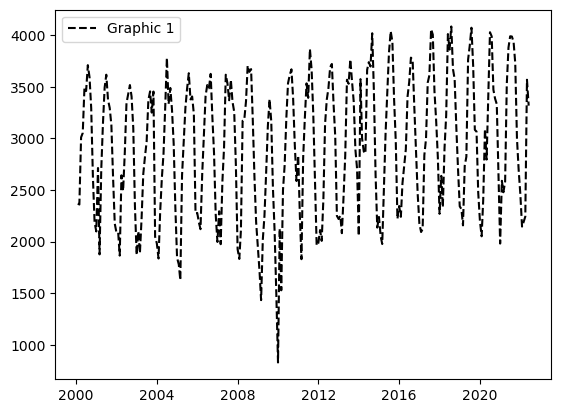

In [486]:
import matplotlib.pyplot as plt
import numpy as np

x = df4['date']
y=df4['max']
# x1 = df6['date']
# y1 = df6['max']

fig, ax = plt.subplots()
ax.plot(x, y, '--',color='black', label='Graphic 1')
# ax.plot(x1, y1,'--',color='black', label='Graphic 2')
ax.legend()
# fig.savefig('d:/Gidromet/temperatura_base/inter_nat_do1000.jpg', dpi=1000)

plt.show()

In [362]:
# import os

# directory_path = 'D:/Gidromet/data.txt'
# # save_path = "D:/Gidromet/tgk/"
# # replace with the actual directory path

# # loop over all the files in the directory
# for filename in os.listdir(directory_path):
#     if filename.endswith("data.txt"):
# #         id=filename[:7]
# #         print(id)# check if the file is a .txt file
#         file_path = os.path.join(directory_path, filename) # get the full path of the file
#         df = pd.read_csv(file_path,header=None,sep='\t',index_col=0)
#         df=df[2:]
# #         df.columns=['id','year','month','day','hour','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
# #                         'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
# #                         'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
# #                         'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','None','None1','None2','TGK','None3']# read the file as a DataFrame using tab as delimiter
# #         df=df[df['year']>=2020]
# #         df1=df[['id','year','month','day','hour','T_air','T_soil', 'T_dew_point']]
#         print(df1.head()) # print the first 5 rows of the DataFrame
# #         df1.to_csv(save_path +str(id)+".txt", header=False)

In [363]:
df=pd.read_csv('D:/Gidromet/Tayyorlari/TGK_sum.txt',index_col=0)
df.columns=['id','year','month','day','hour','T_air','T_soil', 'T_dew_point', 'Partial_pressure', 'Relative_humidity', 
                        'saturation_deficit','Atmosphere_pressure_station','Atmosphere_pressure_sea_level','Trend_view',
                        'Trend_volume','Visibility','Cloudiness_all',  'Cloudiness_low','Ci','Ac','Cu','St','Fr','Height',
                        'Below','Weather_W','Weather_ww','Wind_right','Wind_speed','Precipitation','None','None1','None2','TGK']


C:\Users\User\AppData\Local\Temp\ipykernel_17032\3260944248.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('D:/Gidromet/Tayyorlari/TGK_sum.txt',index_col=0)


In [364]:
df['T_air'] = pd.to_numeric(df['T_air'], errors='coerce')
df['T_dew_point'] = pd.to_numeric(df['T_dew_point'], errors='coerce')


In [365]:
df['TGK']=((df['T_air']-df['T_dew_point'])/(df['T_air']+273))*1000


In [367]:
df_osat=df1[['id','date','Precipitation']]
df_osat['Precipitation'] = pd.to_numeric(df_osat['Precipitation'], errors='coerce')
df_osat

C:\Users\User\AppData\Local\Temp\ipykernel_17032\1515901671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_osat['Precipitation'] = pd.to_numeric(df_osat['Precipitation'], errors='coerce')


,id,date,Precipitation
0,,,
1,3736730,2009-01-01 23:00:00,NaN
2,3736730,2009-01-02 23:00:00,NaN
3,3736730,2009-01-03 23:00:00,NaN
4,3736730,2009-01-04 23:00:00,NaN
5,3736730,2009-01-05 23:00:00,NaN
...,...,...,...
40900,4515830,2022-12-27 20:00:00,NaN
40901,4515830,2022-12-28 20:00:00,NaN
40902,4515830,2022-12-29 20:00:00,NaN


In [390]:
# df_os=df_osat[df_osat['id']==4076450]


In [391]:
# df_osat['id'].unique()

In [394]:
# df2=df1.groupby(['id','date'])['Precipitation'].sum()
# df2

In [395]:
# for i in df_osat['id'].unique():
# #     print('for sikl boshlandi')    
#     if  (df_osat['id'].unique()==i).any():
# #         df1.groupby(['id','date'])['Precipitation'].sum()
#         df_osat=df1[['id','date','Precipitation']]
#         df_osat['Precipitation'] = pd.to_numeric(df_osat['Precipitation'], errors='coerce')
#         df_os=df_osat[df_osat['id']==i]
#         df2=df_os.groupby(pd.Grouper(key='date',freq='M')).sum()
#         df2['id1']=i
#         df2=df2
#         print(df2)

In [396]:
# df2=df_os.groupby('id',pd.Grouper(key='date',freq='M')).sum()
# df2.to_csv('D:/Gidromet/tgk/data_tayyor.txt', header=False)

In [26]:
import os
input_dir = 'D:/Gidromet/Tayyorlari/Meteostations_2009_2022/'
output_file = 'D:/Gidromet/Tayyorlari/TGK_sum.txt'
filenames = os.listdir(input_dir)
with open(output_file, 'a') as outfile:
    n = 0
    for filename in filenames:
        base_filename, extension = os.path.splitext(filename)
        with open(os.path.join(input_dir, filename), 'r') as infile:
            outfile.write(infile.read())
        n += 1

In [560]:
# df = pd.DataFrame({'inglizcha':['accuse','adjust','amuse','coral','cotton','crash','deck','engage','firm','fuel','grand','hurricane','loss','plain','reef','shut','strict','surf','task','zone'],
#     "o'zbekcha":['ayblamoq',"o'zgartirmoq",'kuldirmoq','marjon','paxta','avariya sodir bolmoq','paluba','band bolmoq','mustahkam qilmoq','yonilgi','hashamatli','kuchli dovul','yoqotish','oddiy','chogirtosh','yopib qoymoq','qattiqqol','surf','vazifa','hudud']
#                   })

        

In [559]:
# import random
# random_row = df['inglizcha'].sample(n=1, random_state=random.randint(0, 100))
# print(random_row)
# a=input("So'zni kiriting = ")
# dictionary=df[df["o'zbekcha"]==a]
# print(dictionary)

# # if dictionary=df[df["o'zbekcha"]==a]:
# #     print("natija to'gri")
# # else:
# #     print("natija xato")


In [ ]:
# yil=int(input(" yilni kiriting = "))
# def year(a): 
#     if a % 4 == 0 and (a % 100 != 0 or a % 400 == 0):
#         return True
#     else :
#         return False
# if year(yil):
#     print(f"{yil} = kabisa yili")
# else :
#     print(f"{yil} = oddiy yil")
    

In [ ]:
# y=np.arange(1,34)
# for j in range(len(y)):
#     if y[j]%2==0: 
#         print(f"{y[j]}=juft son")
#     else:
#         print(f"{y[j]}=toq son")
    
